In [1]:
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

In [2]:
with pm.Model() as test:
    x = pm.Normal("x",1,2)
    # realizar a inferência Bayesiana e gerar amostras da distribuição posterior por cadeias MCMC
    # trace captura as amostras
    trace = pm.sample()
pm.summary(trace)

 Progress                   Draws   Divergences   Step size   Grad evals   Sampling Speed    Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.79        1            1952.05 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.18        3            1714.66 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.23        3            1507.61 draws/s   0:00:01   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.00        1            1253.43 draws/s   0:00:01   0:00:00

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,0.991,1.977,-2.862,4.616,0.048,0.029,1690.0,2786.0,1.0


In [3]:
test

x ~ Normal(1, 2)

In [4]:
samples = trace.posterior["x"][0]
samples2 = trace.posterior["x"][1]
xs = np.arange(len(samples))

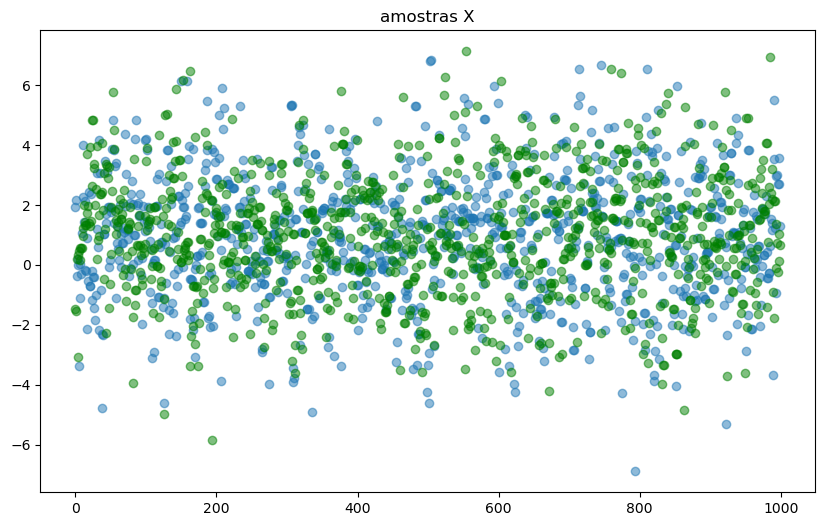

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(xs, samples, alpha=0.5)
plt.scatter(xs, samples2, alpha=0.5, color="green")
plt.title("amostras X")
plt.show()

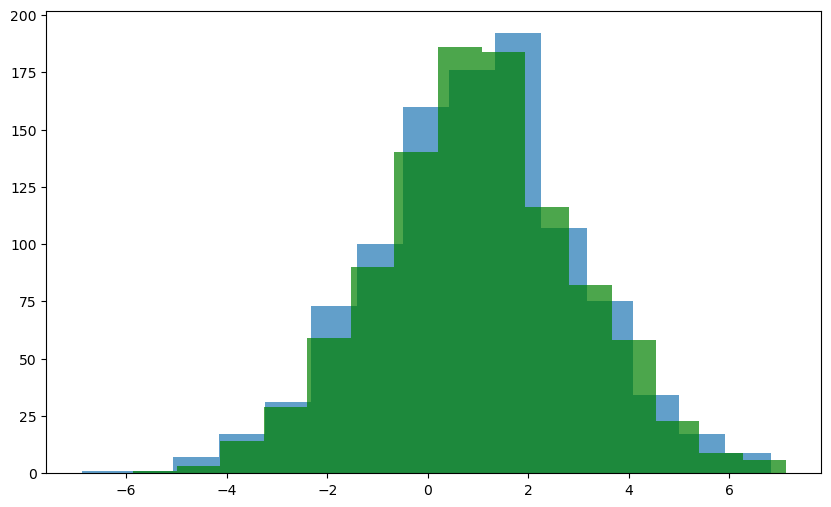

In [6]:
plt.figure(figsize=(10,6))
bs = 15
plt.hist(samples, bs, alpha=0.7)
plt.hist(samples2, bs, alpha=0.7, color="green")
plt.show()

array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>]],
      dtype=object)

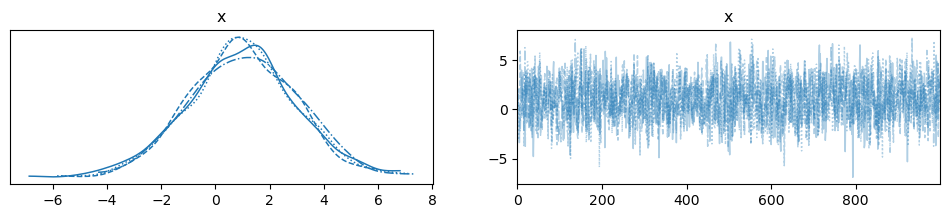

In [7]:
az.plot_trace(trace)

<Axes: title={'center': 'x'}>

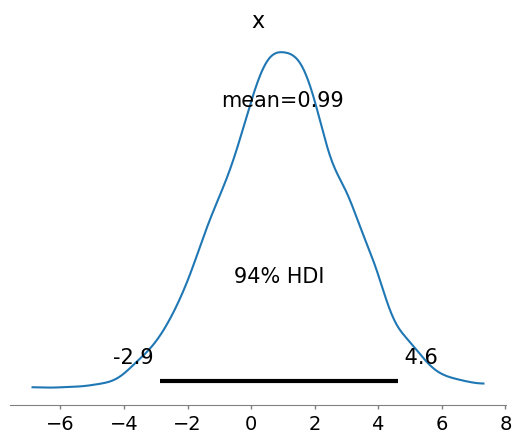

In [11]:
az.plot_posterior(trace, hdi_prob=0.94)